<a href="https://colab.research.google.com/github/omid-sakaki-ghazvini/Data-Mining/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
omidsakaki1370_data_preparation_example_path = kagglehub.dataset_download('omidsakaki1370/data-preparation-example')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-preparation-example/credit_risk_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [ ]:
df = pd.read_csv('/kaggle/input/data-preparation-example/credit_risk_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# **step 1 : Handle Missing Values & Data Cleaning**

# [Data Cleaning Notebook](http://www.kaggle.com/code/omidsakaki1370/data-cleaning)
# [Missing Values Notebook](http://www.kaggle.com/code/omidsakaki1370/missing-values)

## **1-Normalization**

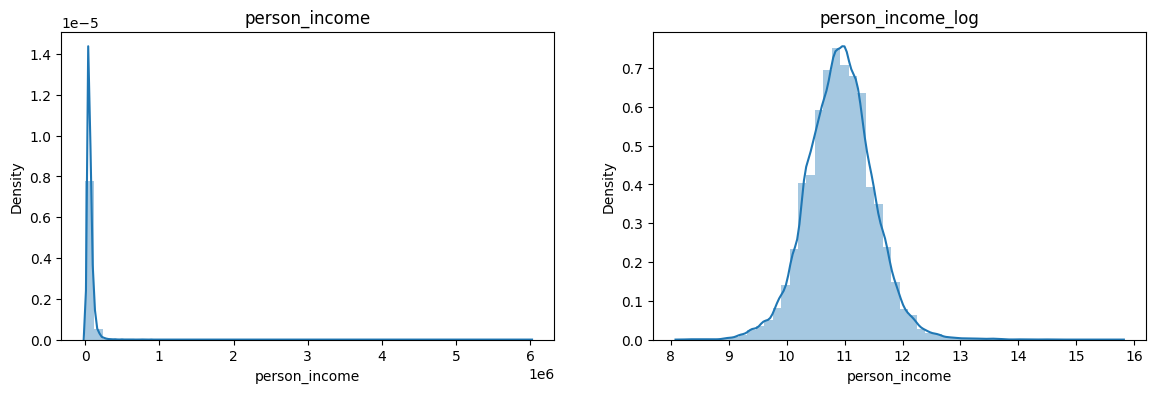

In [ ]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)

sns.distplot(df['person_income']);
ax1.set_title("person_income");

df['person_income'] = np.log(df['person_income'])

ax1 = plt.subplot(122)
sns.distplot(df['person_income']);
ax1.set_title("person_income_log");

## **2-Outliers**

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

df = remove_outliers(df, 'person_age')
df = remove_outliers(df, 'person_income')
df = remove_outliers(df, 'person_emp_length')
df = remove_outliers(df, 'cb_person_cred_hist_length')
df.reset_index(drop=True, inplace=True)

## **3-Encoder**

In [ ]:
encoder=LabelEncoder()

df['person_home_ownership']=encoder.fit_transform(df['person_home_ownership'])
df['loan_intent']=encoder.fit_transform(df['loan_intent'])
df['loan_grade']=encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=encoder.fit_transform(df['cb_person_default_on_file'])

## **4-missing values**

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2679
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df = df.fillna(method = 'ffill')
missing_values_count = df.isnull().sum()

print(missing_values_count)
df.head(10)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,11.089805,3,4.0,3,2,35000,15.23,1,0.53,0,2
1,24,10.904119,3,8.0,3,2,35000,14.27,1,0.55,1,4
2,26,11.252859,3,8.0,1,1,35000,12.42,1,0.45,0,3
3,24,11.276646,3,5.0,3,1,35000,11.11,1,0.44,0,4
4,24,11.326596,3,8.0,4,0,35000,8.90,1,0.42,0,2
5,22,11.350407,3,6.0,5,1,35000,10.37,1,0.41,0,4
6,23,11.461632,3,2.0,5,0,35000,7.90,1,0.37,0,2
7,26,11.591367,3,4.0,1,4,35000,18.39,1,0.32,0,4
8,23,11.652687,3,2.0,1,0,35000,7.90,0,0.30,0,4
9,23,11.695247,3,0.0,1,0,35000,7.90,0,0.29,0,4


In [ ]:
X = df.copy()
y = X.pop("loan_status")

# **step 2 : Feature Engineering**

## **1-Feature selection**

### **1-1-Removing features with low variance**

In [ ]:
X_test = X.copy()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
X_new = selector.fit_transform(X_test, y)

print('X shape :', X.shape)
print('X_new shape :', X_new.shape)

X shape : (28140, 11)
X_new shape : (28140, 11)


### **1-2-Univariate feature selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=8).fit_transform(X_test, y)

print('X shape :', X.shape)
print('X_new shape :', X_new.shape)

X shape : (28140, 11)
X_new shape : (28140, 8)


### **1-3-L1-based feature selection**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_test, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_test)

print('X shape :', X.shape)
print('X_new shape :', X_new.shape)

X shape : (28140, 11)
X_new shape : (28140, 10)


### **1-4-Tree-based feature selection**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=5)
clf = clf.fit(X_test, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_test)

print('X shape :', X.shape)
print('X_new shape :', X_new.shape)

X shape : (28140, 11)
X_new shape : (28140, 5)


## **2-Creating Features**

In [ ]:
X.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,11.089805,3,4.0,3,2,35000,15.23,0.53,0,2
1,24,10.904119,3,8.0,3,2,35000,14.27,0.55,1,4
2,26,11.252859,3,8.0,1,1,35000,12.42,0.45,0,3
3,24,11.276646,3,5.0,3,1,35000,11.11,0.44,0,4
4,24,11.326596,3,8.0,4,0,35000,8.90,0.42,0,2
5,22,11.350407,3,6.0,5,1,35000,10.37,0.41,0,4
6,23,11.461632,3,2.0,5,0,35000,7.90,0.37,0,2
7,26,11.591367,3,4.0,1,4,35000,18.39,0.32,0,4
8,23,11.652687,3,2.0,1,0,35000,7.90,0.30,0,4
9,23,11.695247,3,0.0,1,0,35000,7.90,0.29,0,4


In [ ]:
X["New_Features"] = round(X.loan_int_rate - X.person_income).astype(int)

X[["loan_int_rate", "person_income", "New_Features"]].head(10)

,loan_int_rate,person_income,New_Features
0,15.23,11.089805,4
1,14.27,10.904119,3
2,12.42,11.252859,1
3,11.11,11.276646,0
4,8.90,11.326596,-2
5,10.37,11.350407,-1
6,7.90,11.461632,-4
7,18.39,11.591367,7
8,7.90,11.652687,-4
9,7.90,11.695247,-4


In [ ]:
def F(x):
    if x>=0:
        return 1
    else:
        return 0

X['New_Features'] = X['New_Features'].apply(F)

print(X['New_Features'].head(10))
print(y.head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: New_Features, dtype: int64
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: loan_status, dtype: int64


## **3-Clustering With K-Means**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,New_Features,Cluster
0,23,11.089805,3,4.0,3,2,35000,15.23,0.53,0,2,1,3
1,24,10.904119,3,8.0,3,2,35000,14.27,0.55,1,4,1,3
2,26,11.252859,3,8.0,1,1,35000,12.42,0.45,0,3,1,3
3,24,11.276646,3,5.0,3,1,35000,11.11,0.44,0,4,1,3
4,24,11.326596,3,8.0,4,0,35000,8.90,0.42,0,2,1,3


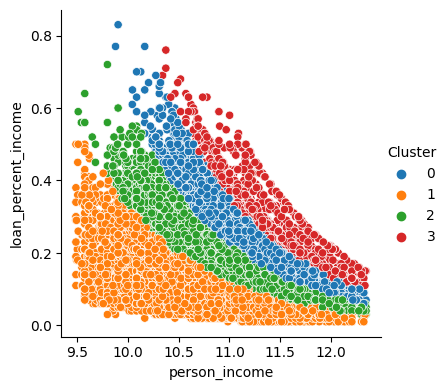

In [ ]:
sns.relplot(x="person_income", y="loan_percent_income", hue="Cluster", data=X, height=4);

## **4-PCA for Feature Engineering**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,25424.494483,-5.349234,2.742429,0.899736,-0.618711,0.585353,1.680425,-1.224232,-0.721814,-0.464277,0.189916,-0.009533,-0.0
1,25424.494706,-2.927622,-0.535049,2.756468,-0.593155,-0.598499,2.167730,-1.224347,-0.176332,-0.667909,-0.771450,-0.019171,-0.0
2,25424.494610,-1.787324,-1.839691,1.074817,1.423448,1.283309,2.397014,-1.216155,-0.794860,-0.407861,0.010022,-0.067897,-0.0
3,25424.494303,-3.324714,-0.619550,-1.727880,-0.604014,-0.609030,2.022002,-1.209491,-0.391492,-0.290408,0.034023,-0.073999,-0.0
4,25424.494275,-3.958169,-4.520051,-1.418787,-1.602756,1.070285,2.531725,-1.202191,-0.639700,-0.318529,-0.156239,-0.089056,0.0
